972
[2 1 0 3]
<bound method NDFrame.head of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes

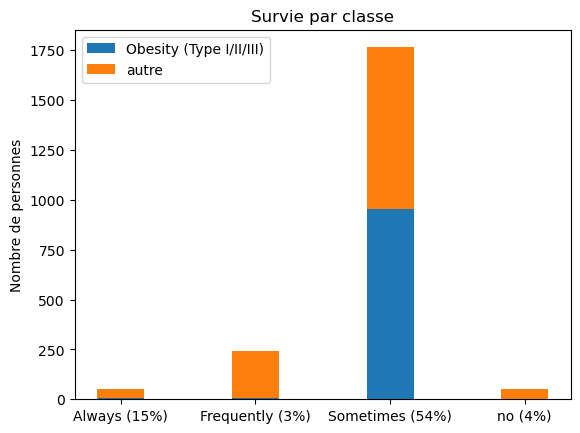

In [18]:
# Importation des bibliothèques et modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Charger jeu de données
x = pd.read_csv('../data/dataset.csv')

#### Transformer la variable cible en variable cible binaire

# # Utiliser LabelEncoder pour convertir les classes en labels numériques
# label_encoder = LabelEncoder()
# labels_numeriques = label_encoder.fit_transform(x.NObeyesdad)

# # Créer une nouvelle colonne binaire (1 pour une classe spécifique, 0 pour les autres)
# classe_specifique = 'Obesity_Type_I'  # Remplacez par la classe que vous souhaitez prédire
# nouvelle_colonne_binaire = (labels_numeriques == label_encoder.transform([classe_specifique])).astype(int)

label_encoder = LabelEncoder()
labels_numeriques = label_encoder.fit_transform(x.NObeyesdad)
# print(labels_numeriques)
classe_specifique = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']  # Remplacez par la classe que vous souhaitez prédire
# nouvelle_colonne_binaire = (labels_numeriques == label_encoder.transform([classe_specifique])).astype(int)
nouvelle_colonne_binaire = x['NObeyesdad'].isin(classe_specifique).astype(int)
# Ajouter la nouvelle colonne binaire à votre dataframe
x['variable_cible_binaire'] = nouvelle_colonne_binaire

print((x.variable_cible_binaire == True).sum())

#### Transformer les valeurs de la colonne CAEC en valeur numérique
 
# Remplacez 'CAEC' par le nom réel de votre colonne contenant des chaînes de caractères
colonne_caec = x['CAEC']

# Utiliser LabelEncoder pour convertir les chaînes en labels numériques
label_encoder_caec = LabelEncoder()
colonne_caec_numerique = label_encoder_caec.fit_transform(colonne_caec)

# Remplacer la colonne d'origine par la colonne numérique
x['CAEC'] = colonne_caec_numerique

print(x.CAEC.unique())

print(x.head)

# print(x['variable_cible_binaire'].sum())

N = 4 # 3 classes
width = 0.35     # la largeur des barres

obesity = []
no_obesity = []
pourcent_per_categori = []
 
for i in [0, 1, 2, 3]:
    obesity.append(x[x.CAEC == i].variable_cible_binaire.sum())
    no_obesity.append(np.abs(x[x.CAEC == i].variable_cible_binaire - 1).sum())
    pourcent_per_categori.append(obesity[i]*100 / (obesity[i] + no_obesity[i]))

print(pourcent_per_categori)

# survived_per_class = [ x[x.CAEC == var].variable_cible_binaire.sum() for var in [1, 2, 3, 4] ]
# not_survived_per_class = [ np.abs(x[x.CAEC == x].variable_cible_binaire - 1).sum() for x in [1, 2, 3] ]
ind = np.arange(N)    

p1 = plt.bar(ind, obesity, width)
p2 = plt.bar(ind, no_obesity, width,
             bottom=obesity)

plt.ylabel('Nombre de personnes')
plt.title('Survie par classe')
plt.xticks(ind, ('Always (' + str(round(pourcent_per_categori[0])) + '%)', 
                'Frequently (' + str(round(pourcent_per_categori[1])) + '%)', 
                'Sometimes (' + str(round(pourcent_per_categori[2])) + '%)', 
                'no (' + str(round(pourcent_per_categori[3])) + '%)'))
plt.legend((p1[0], p2[0]), ('Obesity (Type I/II/III)', 'autre'))